<a href="https://colab.research.google.com/github/akanksha0911/apriori-and-fpgrowth-techniques/blob/main/CMPE_255_FPM_apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Groceries data analysis, which aims to discover how items purchased by customers in a supermarket (or a store) are associated. 
An example association rule is
Cheese -> Beer [support = 10%, confidence = 80%].
The rule says that 10% customers buy Cheese and Beer together, and those who buy Cheese also buy Beer 80% of the time.Support and confidence are two measures of rule strength.
 
Support(A) = (Transactions containing (A))/(Total Transactions)
Confidence(A→B) = (Transactions containing both (A andB))/(Transactions containing A)
Lift(A→B)=(Confidence(A→B))/(Support(B))


A rule’s confidence is a measurement of its predictive power or accuracy. The confidence tells us the proportion of transactions where the presence of item or itemset LHS results in the presence of item or itemset RHS.


In [308]:
import matplotlib.pyplot as plt
import seaborn as sns


In [309]:
# to install the package
!pip install mlxtend

# you may run into a problem later on doing fpgrowth if you do not upgrade the package
%pip install mlxtend --upgrade

In [310]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt
plt.style.use('default')

In [311]:
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


In [312]:
df = pd.read_csv("""/content/drive/MyDrive/Kaggle_data/groceries - groceries.csv""")

df.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,Item 11,Item 12,Item 13,Item 14,Item 15,Item 16,Item 17,Item 18,Item 19,Item 20,Item 21,Item 22,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [313]:
df.shape

(9835, 33)

In [314]:
data = df.fillna('')

In [315]:
data.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,Item 11,Item 12,Item 13,Item 14,Item 15,Item 16,Item 17,Item 18,Item 19,Item 20,Item 21,Item 22,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,tropical fruit,yogurt,coffee,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1,whole milk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,4,pip fruit,yogurt,cream cheese,meat spreads,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,4,other vegetables,whole milk,condensed milk,long life bakery product,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [316]:
data.drop(columns=['Item(s)'],inplace=True)
data.isnull().sum().all()

False

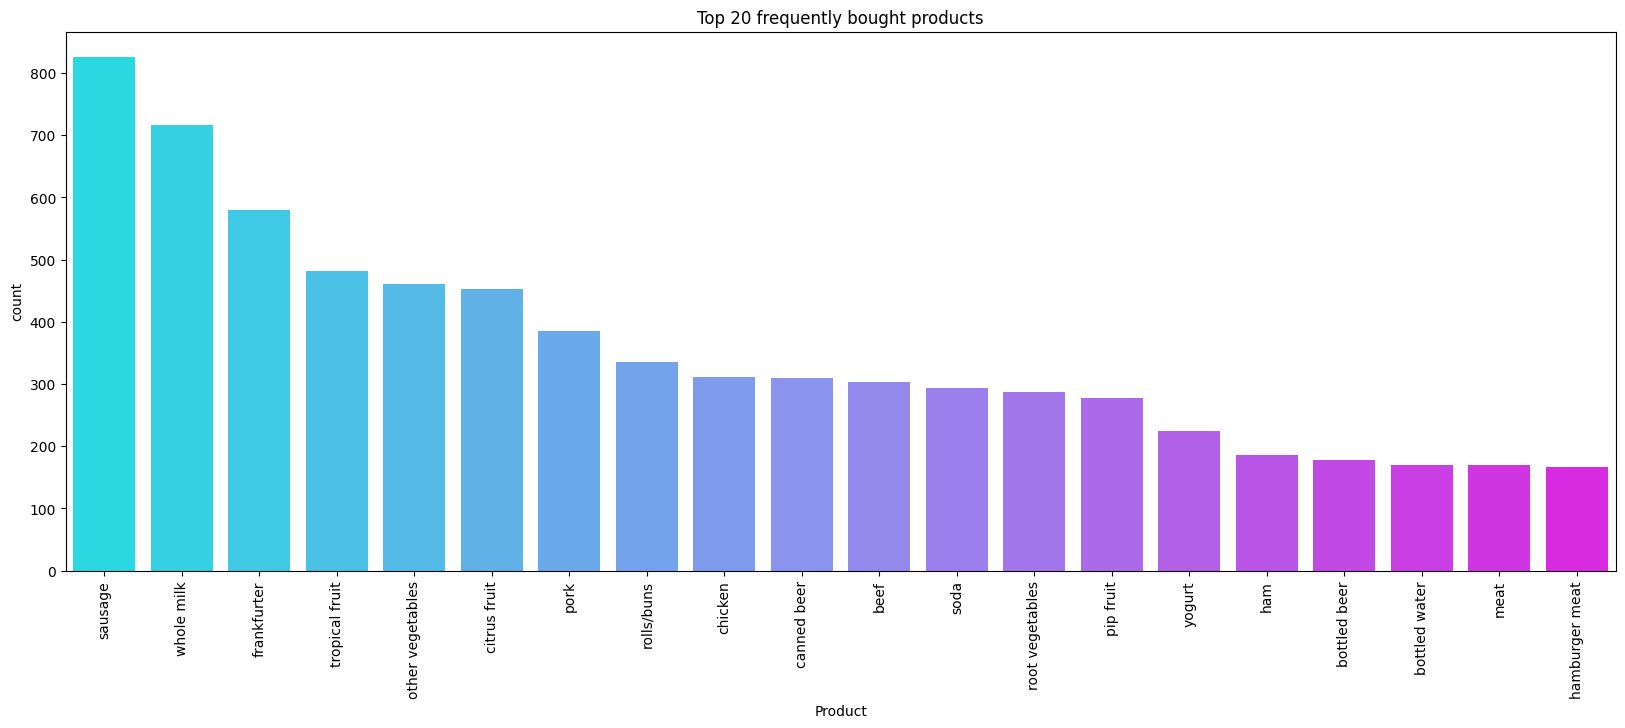

In [317]:
#Top 20 frequently buying items by customer
plt.rcParams['figure.figsize']=20,7
sns.countplot(data=data, x=data['Item 1'],
             order = data['Item 1'].value_counts().head(20).index,
             palette='cool')
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.title('Top 20 frequently bought products')
plt.show()

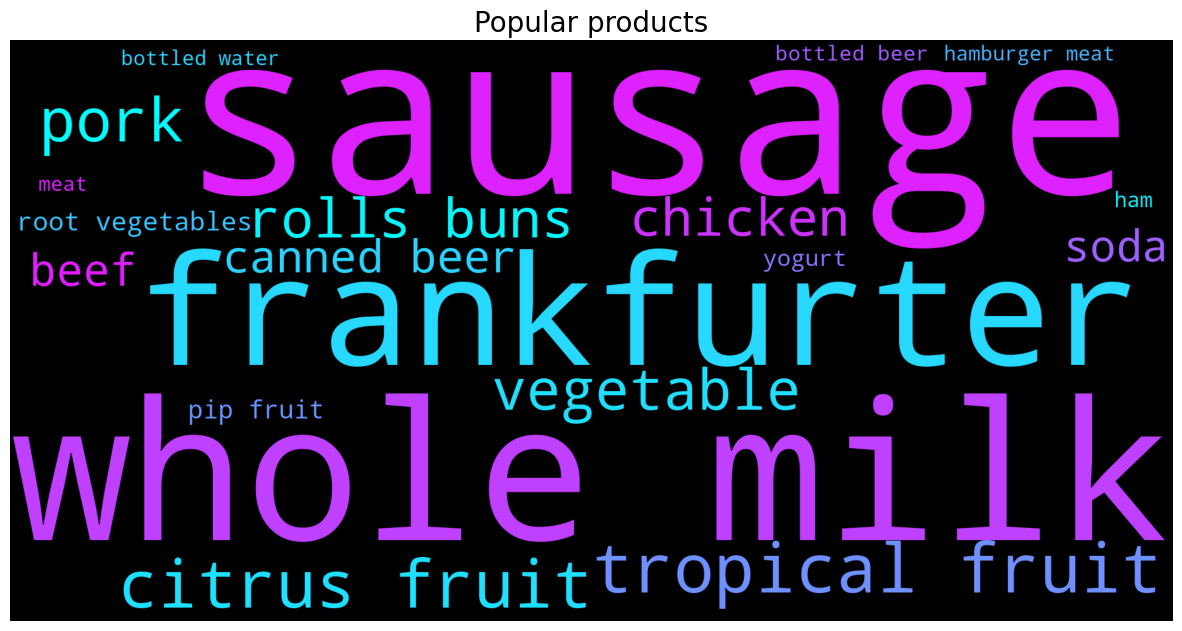

In [318]:
#let's check popular products
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(width = 2000,  height = 1000, max_words = 20, colormap='cool').generate(str(data['Item 1']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Popular products',fontsize = 20)
plt.show()


In [319]:
data.shape

(9835, 32)

In [320]:
#let's create a list of list of transaction
trans = []
for i in range(0, 9835 ):
     trans.append([str(data.values[i,j]) for j in range(0, 32)])

In [321]:
te = TransactionEncoder()
onehot = te.fit_transform(trans)
onehot = pd.DataFrame(onehot, columns = te.columns_)

In [322]:
print(f'Shape of encoded data: {onehot.shape[0]} rows and {onehot.shape[1]} columns')

Shape of encoded data: 9835 rows and 170 columns


In [323]:

itemsets=apriori(onehot, min_support = 0.02, use_colnames = True)
itemsets           #support values for frequent itemsets

,support,itemsets
0,0.999898,()
1,0.033452,(UHT-milk)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)
5,0.080529,(bottled beer)
6,0.110524,(bottled water)
7,0.064870,(brown bread)
8,0.055414,(butter)
9,0.027961,(butter milk)


In [324]:
frequent_itemsets=itemsets.sort_values(by=['support'], ascending=False) #sorting to get top 10 frequent itemsets
Top_ten=frequent_itemsets[:10]
Top_ten


,support,itemsets
0,0.999898,()
58,0.255516,(whole milk)
117,0.255414,"(, whole milk)"
40,0.193493,(other vegetables)
99,0.193391,"(, other vegetables)"
44,0.183935,(rolls/buns)
103,0.183833,"(, rolls/buns)"
109,0.174377,"(, soda)"
50,0.174377,(soda)
59,0.139502,(yogurt)


In [325]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.2)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(),(whole milk),0.999898,0.255516,0.255414,0.255440,0.999704,-0.000076,0.999898
1,(whole milk),(),0.255516,0.999898,0.255414,0.999602,0.999704,-0.000076,0.255516
2,(other vegetables),(),0.193493,0.999898,0.193391,0.999475,0.999576,-0.000082,0.193493
3,(rolls/buns),(),0.183935,0.999898,0.183833,0.999447,0.999549,-0.000083,0.183935
4,(soda),(),0.174377,0.999898,0.174377,1.000000,1.000102,0.000018,inf


Antecedents
First product to purchase
Consequents
Second product that can be purchase with first product
Confidence
Ratio of purchasers of the product to purchase the other product
Lift
Ratio of purchase increase second product owing to fist product purchasing 

In [326]:
rules[rules["lift"]>2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
56,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
57,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941
58,"(, root vegetables)",(other vegetables),0.108897,0.193493,0.047280,0.434174,2.243877,0.026209,1.425362
59,"(, other vegetables)",(root vegetables),0.193391,0.108998,0.047280,0.244479,2.242963,0.026201,1.179321
61,(root vegetables),"(, other vegetables)",0.108998,0.193391,0.047280,0.433769,2.242963,0.026201,1.424522
62,(other vegetables),"(, root vegetables)",0.193493,0.108897,0.047280,0.244351,2.243877,0.026209,1.179255
148,(tropical fruit),(yogurt),0.104931,0.139502,0.029283,0.279070,2.000475,0.014645,1.193594
149,(yogurt),(tropical fruit),0.139502,0.104931,0.029283,0.209913,2.000475,0.014645,1.132873
160,(whipped/sour cream),(other vegetables),0.071683,0.193493,0.028876,0.402837,2.081924,0.015006,1.350565
161,"(, whipped/sour cream)",(other vegetables),0.071581,0.193493,0.028775,0.401989,2.077540,0.014924,1.348649


In [327]:
Top_rules=rules.sort_values(by=['lift'], ascending=False) #sorting to get top 10 rules based on lift
Top_rules[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
246,"(whole milk, other vegetables)",(root vegetables),0.074835,0.108998,0.023183,0.309783,2.842082,0.015026,1.290900
247,(root vegetables),"(whole milk, other vegetables)",0.108998,0.074835,0.023183,0.212687,2.842082,0.015026,1.175091
260,(root vegetables),"(, whole milk, other vegetables)",0.108998,0.074733,0.023081,0.211754,2.833467,0.014935,1.173830
254,"(, whole milk, other vegetables)",(root vegetables),0.074733,0.108998,0.023081,0.308844,2.833467,0.014935,1.289146
259,"(whole milk, other vegetables)","(, root vegetables)",0.074835,0.108897,0.023081,0.308424,2.832259,0.014932,1.288511
256,"(, root vegetables)","(whole milk, other vegetables)",0.108897,0.074835,0.023081,0.211951,2.832259,0.014932,1.173995
331,(pip fruit),"(, tropical fruit)",0.075648,0.104830,0.020437,0.270161,2.577145,0.012507,1.226532
335,(pip fruit),(tropical fruit),0.075648,0.104931,0.020437,0.270161,2.574648,0.012499,1.226392
329,"(, pip fruit)",(tropical fruit),0.075648,0.104931,0.020437,0.270161,2.574648,0.012499,1.226392
244,"(root vegetables, whole milk)",(other vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,0.013719,1.533320


**High relation products found**

**Frequent Itemsets via the FP-Growth Algorithm**

**Using Apriori needs a generation of candidate itemsets. These itemsets may be large in number if the itemset in the database is huge.
Apriori needs multiple scans of the database to check the support of each itemset generated and this leads to high costs.
These shortcomings can be overcome using the FP growth algorithm.**

**FP Growth	Vs  Apriori

Pattern Generation	
FP growth generates pattern by constructing a FP tree	Apriori generates pattern by pairing the items into singletons, pairs and triplets.

Candidate Generation	
There is no candidate generation	Apriori uses candidate generation

Process	

The process is faster as compared to Apriori. The runtime of process increases linearly with increase in number of itemsets.	The process is comparatively slower than FP Growth, the runtime increases exponentially with increase in number of itemsets**

In [328]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [329]:
from mlxtend.preprocessing import TransactionEncoder

# instantiate a transaction encoder
te = TransactionEncoder()

# transform the list of transaction tuples into an array of encoded transactions
te_ary = te.fit(dataset).transform(dataset)


# convert the array of encoded transactions into a dataframe
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


Let's take minsup =0.6

In [330]:
# compute the frequent itemsets using fpgriowth from mlxtend
from mlxtend.frequent_patterns.fpgrowth import fpgrowth
frequent_itemsets = fpgrowth(df, min_support=0.6, use_colnames = True)

# print the frequent itemsets
frequent_itemsets

,support,itemsets
0,1.0,(Kidney Beans)
1,0.8,(Eggs)
2,0.6,(Yogurt)
3,0.6,(Onion)
4,0.6,(Milk)
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Kidney Beans, Yogurt)"
7,0.6,"(Onion, Eggs)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Kidney Beans, Onion, Eggs)"


The items that are not in here are filtered out because they do not reach the minimum support level

last step, we need to use the association_rules function to convert those frequent itemsets into association rules

In [331]:

# compute and print the association rules
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.80,1.00,0.00,1.0
1,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.00,1.00,0.00,inf
2,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
3,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
4,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
5,(Onion),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
6,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
7,"(Kidney Beans, Eggs)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
8,"(Onion, Eggs)",(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
9,(Onion),"(Kidney Beans, Eggs)",0.6,0.8,0.6,1.00,1.25,0.12,inf


we can conclude that there are two product combinations, and both associations are bidirectional.